# Рынок заведений общественного питания Москвы

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

## Шаг №1. Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import datetime as dt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
data = pd.read_csv('/datasets/rest_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


С типом данных все в порядке.

In [4]:
data.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [5]:
data.duplicated().sum()

0

In [6]:
data[data.duplicated(['object_name', 'chain', 'object_type', 'address'])]

,id,object_name,chain,object_type,address,number
115,28614,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",12
580,149205,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",35
581,149131,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",39
1409,151267,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",45
2375,28604,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",150
...,...,...,...,...,...,...
15173,218542,Кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корп...",0
15216,214468,Макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 87Б",0
15217,214146,Макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 13А",0
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20


In [7]:
data = data.drop_duplicates(['object_name', 'chain', 'object_type', 'address'])

In [8]:
data[data.duplicated(['object_name', 'chain', 'object_type', 'address'])]

,id,object_name,chain,object_type,address,number


In [9]:
data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

Пропусков и дубликатов не обнаружено. Теперь приведем все к одному регистру в столбце с названиями заведений.

In [10]:
data['object_name'] = data['object_name'].str.lower()

Данные готовы к дальнейшей работе с ними.

## Шаг №2. Анализ данных

### Исследуйте соотношение видов объектов общественного питания по количеству.

Для начала посчитаем, сколько объектов каждого типа есть в нашем датасете.

In [11]:
data.groupby('object_type')['object_type'].count()

object_type
бар                                   853
буфет                                 571
закусочная                            348
кафе                                 6017
кафетерий                             393
магазин (отдел кулинарии)             272
предприятие быстрого обслуживания    1891
ресторан                             2276
столовая                             2575
Name: object_type, dtype: int64

Теперь - сколько всего заведений.

In [62]:
sum_data = data.groupby('object_type')['object_type'].count().sum()
sum_data

15196

И теперь найдем процентное соотношение.

In [13]:
(data.groupby('object_type')['object_type'].count() / \
 data.groupby('object_type')['object_type'].count().sum() * 100).sort_values(ascending = False)

object_type
кафе                                 39.595946
столовая                             16.945249
ресторан                             14.977626
предприятие быстрого обслуживания    12.444064
бар                                   5.613319
буфет                                 3.757568
кафетерий                             2.586207
закусочная                            2.290076
магазин (отдел кулинарии)             1.789945
Name: object_type, dtype: float64

<div class="alert alert-warning">
<b>Комментарий ревьюера: </b> Совет: можно изменить настройки форматирования датафрейма таким образом, чтобы доли отображались как проценты: <a>https://stackoverflow.com/a/36175424/11664121</a>. При этом сами данные не изменятся, настраивается только внешний вид выбранного датафрейма.
</div>

Примерно 40 % всех заведений составляют кафе, на втором месте - столовые (17 %), на третьем - рестораны (15 %).

Построим график по количеству каждого типа заведений.

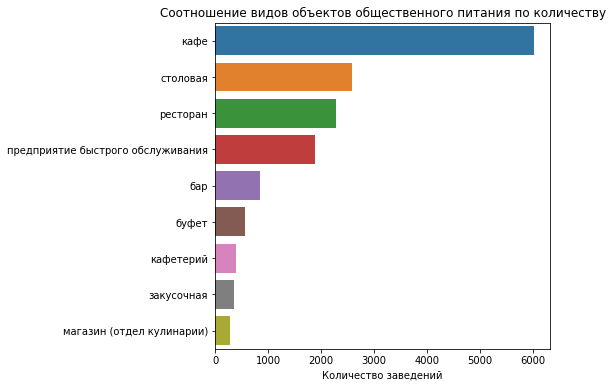

In [14]:
plt.figure(figsize = (6,6))
sns.countplot(y="object_type", data=data, order=data['object_type'].value_counts().index) 

plt.title('Соотношение видов объектов общественного питания по количеству')
plt.xlabel('Количество заведений')
plt.ylabel('');

По графику тоже прекрасно видно, что кафе гораздо больше, чем других видов объектов.

### Исследуйте соотношение сетевых и несетевых заведений по количеству.

Для начала узнаем, сколько у нас сетевых и несетевых заведений.

In [15]:
data['chain'].value_counts()

нет    12245
да      2951
Name: chain, dtype: int64

In [63]:
data['chain'].value_counts() / sum_data * 100

нет    80.580416
да     19.419584
Name: chain, dtype: float64

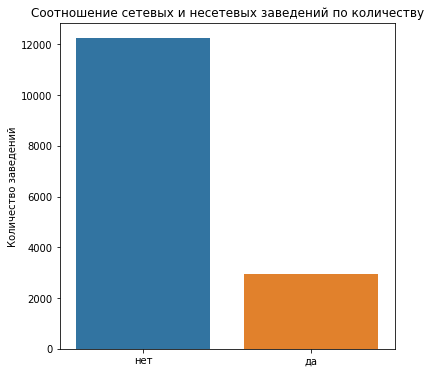

In [17]:
plt.figure(figsize = (6,6))
sns.countplot(x="chain", data=data)

plt.title('Соотношение сетевых и несетевых заведений по количеству')
plt.xlabel('')
plt.ylabel('Количество заведений');

Несетевых заведений - 80% от общего числа.

### Для какого вида объекта общественного питания характерно сетевое распространение?

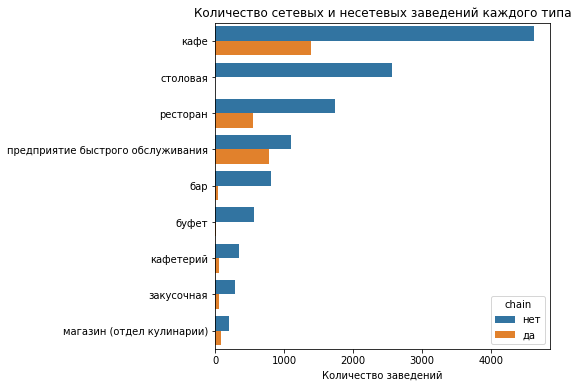

In [18]:
plt.figure(figsize = (6,6))
sns.countplot(y="object_type", hue='chain',  data=data, order=data['object_type'].value_counts().index)
plt.title('Количество сетевых и несетевых заведений каждого типа')
plt.xlabel('Количество заведений')
plt.ylabel('');

Из графика видно, что несетевых заведений каждого типа в разы больше, чем сетевых. Так что, чтобы ответить на вопрос, какому типу характерно сетевое распространение, надо узнать, для какого типа заведений разница в количестве между сетевыми и несетевыми - наименьшая. Для этого найдем доли сетевых заведений от несетевых.

In [19]:
(data[data['chain'] == 'да']['object_type'].value_counts() / \
 data[data['chain'] == 'нет']['object_type'].value_counts() * 100).sort_values(ascending = False)

предприятие быстрого обслуживания    70.822042
магазин (отдел кулинарии)            40.206186
ресторан                             31.257209
кафе                                 30.012965
закусочная                           19.178082
кафетерий                            14.912281
бар                                   4.534314
буфет                                 1.964286
столовая                              0.116641
Name: object_type, dtype: float64

Из графика и из цифр видно, что для предприятий быстрого обслуживания наиболее характерно сетевое распространение. Но все же хорошо, что мы посчитали еще и доли, потому что на 2 место вырвались отделы кулинарии, что было неочевидно по графику.

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Посмотрим для сетевых заведений медианное количество посадочных мест для каждого названия и построим диаграмму рассеивания.

In [20]:
chain_objects = data[data['chain'] == 'да'].groupby('object_name').agg({'object_name':'count', 'number':'median'})
chain_objects.columns = ['objects', 'median_number']
chain_objects

,objects,median_number
object_name,,
beverly hills diner,1,88.0
bierloga,1,75.0
black & white,1,40.0
bocconcino,3,68.0
boobo,1,46.0
...,...,...
ямми микс,1,2.0
ян примус,1,300.0
японский ресторан «ваби-саби»,1,155.0


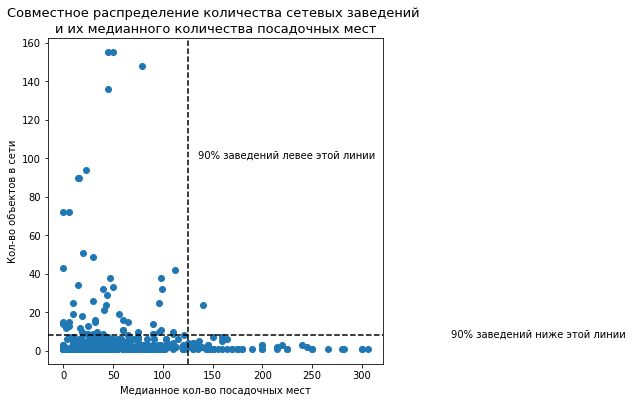

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(chain_objects['median_number'], chain_objects['objects'])
plt.xlabel('Медианное кол-во посадочных мест')
plt.ylabel('Кол-во объектов в сети')
plt.title('Совместное распределение количества сетевых заведений \nи их медианного количества посадочных мест', fontsize=13)
plt.axhline(np.percentile(chain_objects['objects'], 90), linestyle='--', color='black')
plt.axvline(np.percentile(chain_objects['median_number'], 90), linestyle='--', color='black')
plt.text(390,7, '90% заведений ниже этой линии')
plt.text(135,100, '90% заведений левее этой линии')
plt.show()

In [22]:
print('Медианное значение посадочных мест:', int(np.percentile(chain_objects['median_number'], 90)))
print('Медианное значение количества заведений в одной сети:', int(np.percentile(chain_objects['objects'], 90)))
    

Медианное значение посадочных мест: 125
Медианное значение количества заведений в одной сети: 8


У 90 % сетевых заведений менее 125 посадочных мест и менее 8 ресторанов. Таким образом, для сетевых заведений характерно маленькое количество ресторанов, но большое количество посадочных мест.

### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?

In [23]:
data_mean_number = data.pivot_table(index='object_type', values='number', aggfunc='median')\
.sort_values(by='number', ascending=False).reset_index()

In [24]:
data_mean_number

,object_type,number
0,столовая,103
1,ресторан,80
2,бар,35
3,буфет,32
4,кафе,32
5,кафетерий,6
6,предприятие быстрого обслуживания,6
7,закусочная,0
8,магазин (отдел кулинарии),0


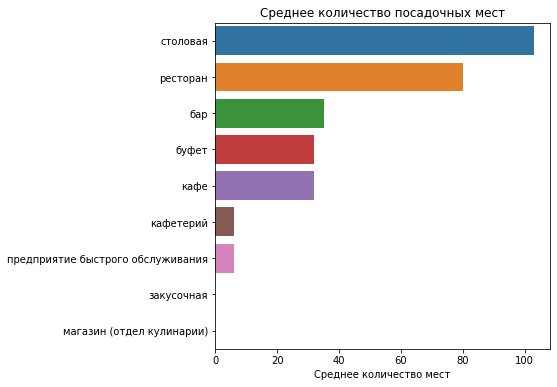

In [25]:
plt.figure(figsize = (6,6))
sns.barplot(y='object_type', x='number', data=data_mean_number) 

plt.title('Cреднее количество посадочных мест')
plt.xlabel('Среднее количество мест')
plt.ylabel('');

Наибольшее среднее количество мест - у столовых, что логично, так как необходимо накормить большое количество человек в одно время. На втором месте - рестораны.

### Выделите в отдельный столбец информацию об улице из столбца address .

In [26]:
data['street'] = data['address'].apply(lambda x: x.split(', ')[1])

In [27]:
data

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15359,222077,кофейня «шоколадница»,да,кафе,"город Москва, Кантемировская улица, дом 47",72,Кантемировская улица
15360,219759,шоколадница,да,кафе,"город Москва, улица Вавилова, дом 3",36,улица Вавилова
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал


### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Посмотрим на топ Московских улиц по количеству заведений.

In [28]:
data['street'].value_counts().sort_values(ascending = False).head(12)

город Зеленоград          230
проспект Мира             197
Профсоюзная улица         180
Ленинградский проспект    170
Пресненская набережная    165
Варшавское шоссе          160
Ленинский проспект        147
поселение Сосенское       137
проспект Вернадского      127
Кутузовский проспект      114
Каширское шоссе           110
Кировоградская улица      107
Name: street, dtype: int64

В топе есть город Зеленоград и поселение Сосенское без указания улиц. Лучше их убрать, потому что они влияют на результаты исследования. (Зеленоград и Сосенское это все же не улицы)

In [29]:
data_new = data.loc[data['street'] != 'город Зеленоград']
data_new = data_new.loc[data['street'] != 'поселение Сосенское']
data_new['street'].value_counts().sort_values(ascending = False).head(10)

проспект Мира             197
Профсоюзная улица         180
Ленинградский проспект    170
Пресненская набережная    165
Варшавское шоссе          160
Ленинский проспект        147
проспект Вернадского      127
Кутузовский проспект      114
Каширское шоссе           110
Кировоградская улица      107
Name: street, dtype: int64

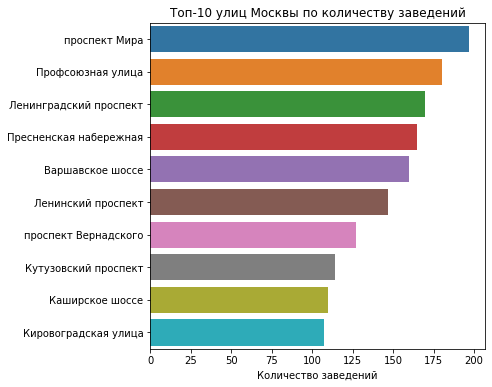

In [30]:
plt.figure(figsize = (6,6))
sns.countplot(y="street", data=data_new, order=data_new['street'].value_counts().head(10).index) 

plt.title('Топ-10 улиц Москвы по количеству заведений')
plt.xlabel('Количество заведений')
plt.ylabel('');

Получили топ-10 улиц Москвы. Среди них лидер - проспект Мира.

Теперь посмотрим, в каких районах эти улицы находятся.

Скачаем датасеты с портала открытых данных правительства Москвы и сохраним в гугл-таблицах.

1YxnZ3u7znX8fD_caYbkSENfE7f4Ctjr4zHgvFmj_B1o - улицы Москвы

1QnFQQZOynA5DIj2aHZdefKc_VO6I79bACp7rKaFKyf8 - районы Москвы

In [31]:
from io import BytesIO
import requests
spreadsheet_id = '1YxnZ3u7znX8fD_caYbkSENfE7f4Ctjr4zHgvFmj_B1o'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
streets = pd.read_csv(BytesIO(r.content))
streets

,UM_CODE,UM_NAMEF,global_id,UM_NAMES,UM_TRANS,UM_TYPE,UM_TM,UM_TE,UM_KLADR
0,008880,1-й Ирининский переулок,58481065,1-й Ирининский пер.,Pervy'j Irininskij pereulok,002,NaN,0102,77000000000706300
1,008890,2-й Ирининский переулок,58481066,2-й Ирининский пер.,Vtoroj Irininskij pereulok,002,NaN,0102,77000000000362200
2,008891,3-й Ирининский переулок,58481067,3-й Ирининский пер.,Tretij Irininskij pereulok,002,NaN,0102,77000000000362300
3,008910,Иркутская улица,58481068,Иркутская ул.,Irkutskaya ulicza,001,NaN,0406,77000000000139700
4,008920,1-й Иртышский проезд,58481069,1-й Иртышский пр.,Pervy'j Irty'shskij proezd,003,NaN,0406,77000000000331600
...,...,...,...,...,...,...,...,...,...
5277,050170,5-й Самоцветный переулок,1078927555,5-й Самоцветный пер.,Pyaty`j Samoczvetny`j pereulok,002,737000,1209,77000005000020100
5278,050175,6-й Самоцветный переулок,1078927592,6-й Самоцветный пер.,Shestoj Samoczvetny`j pereulok,002,737000,1209,77000005000020200
5279,050180,7-й Самоцветный переулок,1078927596,7-й Самоцветный пер.,Sed`moj Samoczvetny`j pereulok,002,737000,1209,77000005000020300
5280,050185,8-й Самоцветный переулок,1078927598,8-й Самоцветный пер.,Vos`moj Samoczvetny`j pereulok,002,737000,1209,77000005000020400


In [32]:
spreadsheet_id = '1QnFQQZOynA5DIj2aHZdefKc_VO6I79bACp7rKaFKyf8'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
districts = pd.read_csv(BytesIO(r.content))
districts

,Kod,Name,global_id,Latin_name,Type,Kod_okato
0,100,Центральный административный округ,58703558,Czentral`ny'j administrativny'j okrug,2,45286000
1,101,район Арбат,58703559,rajon Arbat,3,45286552
2,102,Басманный район,58703560,Basmanny'j rajon,3,45286555
3,103,район Замоскворечье,58703561,rajon Zamoskvorech`e,3,45286560
4,104,Красносельский район,58703562,Krasnosel`skij rajon,3,45286565
...,...,...,...,...,...,...
153,1206,поселение Новофедоровское,58703712,poselenie Novofedorovskoe,4,45298567
154,1207,поселение Первомайское,58703713,poselenie Pervomajskoe,4,45298572
155,1208,поселение Роговское,58703714,poselenie Rogovskoe,4,45298575
156,1209,поселение Троицк,58703715,poselenie Troiczk,4,45298578


In [33]:
streets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 9 columns):
UM_CODE      5282 non-null object
UM_NAMEF     5282 non-null object
global_id    5282 non-null object
UM_NAMES     5282 non-null object
UM_TRANS     5282 non-null object
UM_TYPE      5282 non-null object
UM_TM        1322 non-null object
UM_TE        5282 non-null object
UM_KLADR     5091 non-null object
dtypes: object(9)
memory usage: 371.5+ KB


In [34]:
districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 6 columns):
Kod           158 non-null int64
Name          158 non-null object
global_id     158 non-null int64
Latin_name    158 non-null object
Type          158 non-null int64
Kod_okato     158 non-null int64
dtypes: int64(4), object(2)
memory usage: 7.5+ KB


In [35]:
streets = streets[['UM_NAMEF', 'UM_TE']]
districts = districts[['Kod', 'Name']]

In [36]:
streets.columns = ['street', 'code']
districts.columns = ['code', 'district']

In [37]:
streets

,street,code
0,1-й Ирининский переулок,0102
1,2-й Ирининский переулок,0102
2,3-й Ирининский переулок,0102
3,Иркутская улица,0406
4,1-й Иртышский проезд,0406
...,...,...
5277,5-й Самоцветный переулок,1209
5278,6-й Самоцветный переулок,1209
5279,7-й Самоцветный переулок,1209
5280,8-й Самоцветный переулок,1209


In [38]:
districts

,code,district
0,100,Центральный административный округ
1,101,район Арбат
2,102,Басманный район
3,103,район Замоскворечье
4,104,Красносельский район
...,...,...
153,1206,поселение Новофедоровское
154,1207,поселение Первомайское
155,1208,поселение Роговское
156,1209,поселение Троицк


После "упрощения" таблиц, получили две таблицы. В первой - название улицы и код территориальной единицы, во второй - код территориальной единицы и название округа. Но коды в первой и второй таблице различаются по типу данных, и это те типы, которые были на сайте правительства Москвы.

Попробуем привести код в таблице с улицами к int. Посмотрим, из чего состоит этот столбец.

In [39]:
streets['code'].unique()

array(['0102', '0406', '0905', '0303', '0108', '0807', '0507', '0404',
       '0618', '0103;0110', '0110', '0312', '0711', '0513', '0101',
       '0104', '0101;0106', '0310', '0107', '0107;0510', '0610', '0105',
       '0306', '0409', '0612;0618;0615', '0704', '0702', '0505', '0106',
       '0712', '0906', '0510', '0311', '0208', '0701', '0813', '0816',
       '0301', '0606', '0612;0618', '0818;0819', '0703;0710', '0308',
       '0612;0613', '0612;0613;0616;0617', '0213', '0704;0707', '0206',
       '0703', '0805', '0214', '0508', '0102;0104', '0619;0620;0621',
       '0621;0620', '0621', '0417', '0107;0108', '0614', '0103', '0216',
       '0819', '0608', '0820', '0415', '0416', '0103;0609', '0609',
       '0818', '0515;0609', '0515', '0809', '0201', '0708', '0612',
       '0418', '0613', '0212', '0104;0105', '1012', '1011', '0303;0313',
       '0303;0307', '0105;0108', '0109', '0207', '0907', '0304',
       '0110;0610', '0210', '0411;0413', '0203', '0203;0208;0209',
       '0308;0310;

Есть странное значение UM_TE и некоторые коды разделены ";". Видимо из-за того, что некоторые улицы находятся в разных округах.

In [40]:
streets[streets['code'] == 'UM_TE']

,street,code
1000,UM_NAMEF,UM_TE
2001,UM_NAMEF,UM_TE
3002,UM_NAMEF,UM_TE
4003,UM_NAMEF,UM_TE
5004,UM_NAMEF,UM_TE


Видимо какие-то пропущенные данные, поэтому их можно убрать.

In [41]:
streets = streets.loc[streets['code'] != 'UM_TE']

И вот в этот самый момент, когда я думал, как убрать эти точки с запятой, я нашел другой  датасет с сайта мосгаза, где эту работу уже сделали за меня, поэтому дальнейшее исследование будем проводить с помощью нового датасета.

In [42]:
street = pd.read_csv('https://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv')

In [43]:
street.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


Здесь есть не только районы, но и округа! Переименуем названия столбцов для дальнейшего удобства.

In [44]:
street.columns = ['street', 'area_id', 'okrug', 'district']

In [45]:
res = data.merge(street, on = 'street')

In [46]:
res = res.loc[res['street'] != 'город Зеленоград']
res = res.loc[res['street'] != 'поселение Сосенское']

In [47]:
res.duplicated().sum()

78

In [48]:
res = res.drop_duplicates()

Присоединим таблицу к нашему датасету и уберем Зеленоград и Сосенское. Удалим дубликаты.

In [49]:
res_number = res.pivot_table(index=['street','district', 'okrug'], values='number', aggfunc='count')\
.sort_values(by='number', ascending=False).reset_index()

Собрали таблицу из названия улицы, района и округа и количества заведений.

In [50]:
data_new['street'].value_counts().sort_values(ascending = False).head(10)

проспект Мира             197
Профсоюзная улица         180
Ленинградский проспект    170
Пресненская набережная    165
Варшавское шоссе          160
Ленинский проспект        147
проспект Вернадского      127
Кутузовский проспект      114
Каширское шоссе           110
Кировоградская улица      107
Name: street, dtype: int64

Вспомним наш топ-10 улиц и сделаем срез.

In [51]:
res_number.query('number >= 110')

,street,district,okrug,number
0,проспект Мира,Мещанский район,ЦАО,197
1,проспект Мира,Останкинский район,СВАО,197
2,проспект Мира,Район Марьина роща,СВАО,197
3,проспект Мира,Ярославский Район,СВАО,197
4,проспект Мира,Район Ростокино,СВАО,197
5,проспект Мира,Район Свиблово,СВАО,197
6,проспект Мира,Алексеевский район,СВАО,197
7,Профсоюзная улица,Район Черемушки,ЮЗАО,180
8,Профсоюзная улица,Район Ясенево,ЮЗАО,180
9,Профсоюзная улица,Район Теплый Стан,ЮЗАО,180


Можно заметить, что топ-10 улиц это в основном длинные улицы, которые расположены в нескольких районах и даже округах.

### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Зато теперь, после такой объемной подготовительной работы, можно легко ответить на вопрос про улицы с одним объектом.

In [52]:
res_number[res_number['number'] == 1]['street'].count()

560

Всего таких улиц - 560. Такое число улиц очень долго искать в гугле. Но теперь, с нашим новым датасетом, это вопрос одной строчки кода

In [53]:
res_number[res_number['number'] == 1]['district'].unique()

array(['Район Лефортово', 'Район Сокольники', 'Район Аэропорт',
       'Район Марьина роща', 'Район Хамовники', 'Район Ясенево',
       'Басманный район', 'Мещанский район', 'Район Покровское-Стрешнево',
       'Район Соколиная Гора', 'Таганский район', 'Бескудниковский Район',
       'Тимирязевский Район', 'Район Арбат', 'Район Богородское',
       'Головинский район', 'Можайский Район', 'Лосиноостровский район',
       'Район Западное Дегунино', 'Район Преображенское',
       'Нижегородский район', 'Пресненский район',
       'Район Выхино-Жулебино', 'Район Раменки', 'Район Фили-Давыдково',
       'Красносельский район', 'Район Хорошево-Мневники',
       'Район Кузьминки', 'Район Ростокино', 'Рязанский район',
       'Район Текстильщики', 'Алексеевский район', 'Район Сокол',
       'Бабушкинский район', 'Район Якиманка', 'Район Люблино',
       'Район Котловка', 'Даниловский район', 'Район Замоскворечье',
       'Район Измайлово', 'Район Беговой', 'Район Бирюлево Восточное',
       '

Большинство этих районов - спальные. Общественная жизнь в них протекает не очень бурно.

Посмотрим, в каких округах находятся эти улицы.

In [54]:
okrug_chart = res_number[res_number['number'] == 1]['okrug'].value_counts()
okrug_chart

ЦАО           185
ВАО            72
СВАО           67
ЮВАО           55
САО            55
ЗАО            41
ЮАО            30
ЮЗАО           27
СЗАО           27
Зеленоград      1
Name: okrug, dtype: int64

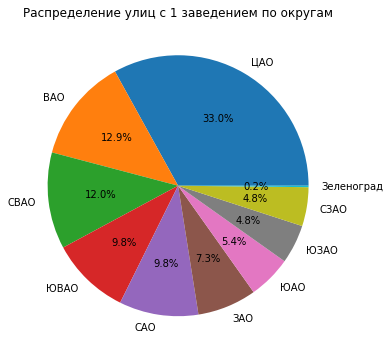

In [55]:
plt.figure(figsize = (6,6))
okrug_chart.plot.pie(autopct="%.1f%%")

plt.title('Распределение улиц с 1 заведением по округам')
plt.xlabel('')
plt.ylabel('');

Удивительно много улиц находится в ЦАО. А большинство таких улиц действительно находится в спальных районах. На всякий случай, посмотрим список улиц, которые находятся в ЦАО.

In [56]:
res_number[(res_number['number'] == 1)&(res_number['okrug'] == 'ЦАО')]['street'].unique()

array(['переулок Хользунова', 'улица Новая Дорога',
       'Малый Ивановский переулок', 'Звонарский переулок',
       'Малый Казённый переулок', 'Сибирский проезд',
       'Большой Николопесковский переулок',
       'Малый Златоустинский переулок', 'Малый Знаменский переулок',
       'Больничный переулок', 'улица Николаева',
       'Малый Власьевский переулок', 'Живарев переулок',
       'Напрудный переулок', 'улица Подвойского',
       '1-й Обыденский переулок', '1-й Спасоналивковский переулок',
       'переулок Васнецова', 'переулок Красина', 'Жуков проезд',
       'Большой Кисельный переулок', 'переулок Маяковского',
       'Петроверигский переулок', 'улица Павла Андреева',
       'Троилинский переулок', 'улица Малая Ордынка',
       'улица Малые Каменщики', 'Триумфальная площадь',
       'Соймоновский проезд', 'Большой Полуярославский переулок',
       'Берниковская набережная', '1-я Миусская улица',
       'Известковый переулок', 'Тетеринский переулок', 'Тестовская улица',
       

Некоторые из этих улиц маленькие, а некоторые идут параллельно более оживленным улицам. Например, улица Малая Ордынка. Она довольно протяженная, но идет параллельно более оживленной Пятницкой улице, на которой огромное число заведений.

### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

Построим распределения.

In [57]:
top_ten = data_new.pivot_table(index='street', values='number', aggfunc='count')\
.sort_values(by='number', ascending=False).reset_index().head(10)

In [58]:
top10_streets_list = top_ten['street'].to_list()

In [59]:
top10_streets_list

['проспект Мира',
 'Профсоюзная улица',
 'Ленинградский проспект',
 'Пресненская набережная',
 'Варшавское шоссе',
 'Ленинский проспект',
 'проспект Вернадского',
 'Кутузовский проспект',
 'Каширское шоссе',
 'Кировоградская улица']

In [60]:
top10_streets_data = data.query('street in @top10_streets_list')

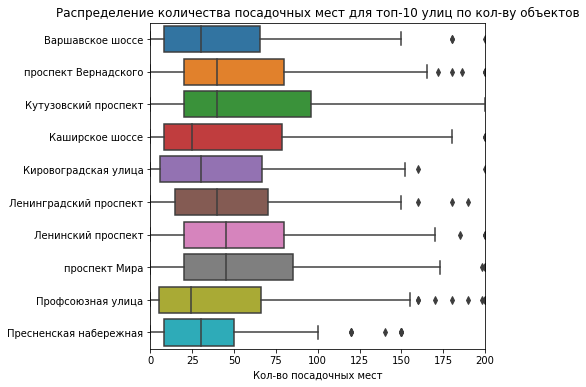

Медианное кол-во посадочных мест в заведениях на топ-10 улицах по количеству объектов: 40.0


In [61]:
top10_streets_data['number'].median()
data['number'].median()
plt.figure(figsize=(6,6))
plt.xlim(0,200)
sns.boxplot(data=top10_streets_data, x='number', y='street')
plt.title('Распределение количества посадочных мест для топ-10 улиц по кол-ву объектов')
plt.ylabel('')
plt.xlabel('Кол-во посадочных мест')
plt.show()
print('Медианное кол-во посадочных мест в заведениях на топ-10 улицах по количеству объектов: {}'\
      .format(top10_streets_data['number'].median()))

Медианное значение посадочных мест для топ-10 улиц варьируется от 25 до 50. Максимальное число варьируется от 100 до 200, но 75% всех заведений имеют менее 100 посадочных мест.

## Вывод

Больше всего в Москве открывают кафе, причем несетевых. Сетевыми же обычно являются преприятия быстрого питания. В такой сети обычно не очень много ресторанов, но большое число посадочных мест, что определенно уменьшает затраты на обслуживающий персонал. Но больше всего посадочных мест - у столовых: они обслуживают большое число рабочих или учащихся в одно время.

Самое большое число завдений расположено на самых длинных улицах Москвы. Улицы, на которых есть только один объект питания, расположены в основном в отдалении от центра Москвы. Такие тенденции связаны с радиальной структурой города. В центре всё находится друг от друга в шаговой доступности и люди ездят в центр города на работу или же проводить свой досуг. До центра города из любой его окраины ехать примерно одно и то же время, поэтому все встречи происходят тоже в центре.

Таким образом, если и открывать точку питания, то лучше открывать кафе в центре Москвы. Клиентов будет гораздо больше, чем в спальных районах. Число посадочных мест - не более 100, потому что в центре очень дорогая аренда площади. Но мало просто открыться в центре, нужно также выбрать правильную улицу, на которой будет большое количество потенциальных клиентов.

Если мы захотим, то можем в дальнейшем открыть сеть таких кафе. Тенденция подсказывает, что таких кафе не должно быть очень много, но в них должно быть достаточно мест для всех желающих.

Презентация: <https://drive.google.com/file/d/1hYAXoWriIGiZzgPZJKFvXm9TADSKR191/view?usp=sharing> 